# ml lab3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

### 1. read data

In [52]:
data = scipy.io.loadmat('data/ex3data1.mat')
x = np.array(data['X'])
y = np.squeeze(data['y'])
X = np.insert(x, 0, 1, axis=1)

### 2. plot data

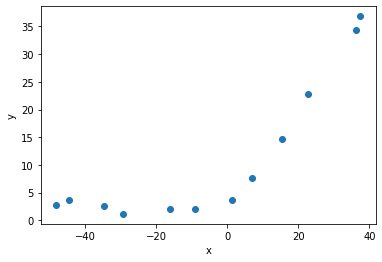

In [53]:
plt.figure()
plt.scatter(x.flatten(), y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3. cost function + L2 regularization

In [54]:
def compute_cost_reg(X, y, theta, l=1):
    m = y.size
    h = X.dot(theta)
    error = h - y
    cost = np.sum(error ** 2) / (2 * m) + (l / (2 * m)) * np.sum(np.square(theta))
    return cost, error

def get_init_theta(_X=X):
    return np.zeros(_X.shape[1])

In [55]:
cost, _ = compute_cost_reg(X, y, get_init_theta())
print(f'Initial Cost:\t{cost}')

Initial Cost:	140.95412088055392


### 4. gradient descent + L2 regularization

In [56]:
def gradient_descent_reg(X, y, theta, l=1, alpha=0.0022, num_iters=1000):
    m = y.size
    j_history = []
    XT = X.T
    for i in range(0, num_iters):
        cost, error = compute_cost_reg(X, y, theta, l)
        gradient = (XT.dot(error) + l * theta) / m
        theta -= alpha * gradient
        j_history.append(cost)

    return theta, j_history

In [57]:
theta, costs = gradient_descent_reg(X, y, get_init_theta())
print(f'Cost:\t{costs[-1]}\ntheta:\t{theta}')

Cost:	29.695375543493448
theta:	[10.86601315  0.35442522]


### 5. linear regression with λ=0

> При λ=0 регуляризация не производится

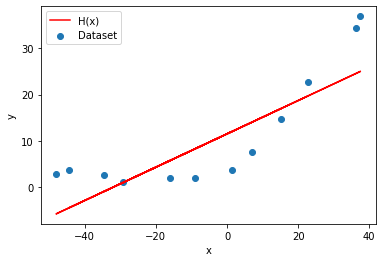

In [58]:
theta, _ = gradient_descent_reg(X, y, get_init_theta(), l=0)
h = X.dot(theta)

plt.figure()
plt.scatter(x.flatten(), y, label='Dataset')
plt.plot(x.flatten(), h, label='H(x)', c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 6. learning curves

In [59]:
def train(x_train, x_val, y_train, y_val):
    X = np.insert(x_train, 0, 1, axis=1)
    
    theta, train_costs = gradient_descent_reg(X, y_train, get_init_theta(), l=0, alpha=0.0005)
    
    X_val = np.insert(x_val, 0, 1, axis=1)
    val_cost = compute_cost_reg(X_val, y_val, theta, l=0)
    
    return train_costs[-1], val_cost[0]


def plot_learning_curves(x_train, x_val, y_train, y_val):
    m, n = x_train.shape
    
    train_costs = []
    val_costs = []
    for size in range(4 , m):
        idx = range(0, size)
        t, v = train(x_train[idx,:], x_val[idx,:], y_train[idx], y_val[idx])
        train_costs.append(t)
        val_costs.append(v)

    plt.figure(figsize=(8, 5))
    plt.plot(train_costs, 'b', label='Train Data')
    plt.plot(val_costs, 'r', label='Validation Data')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

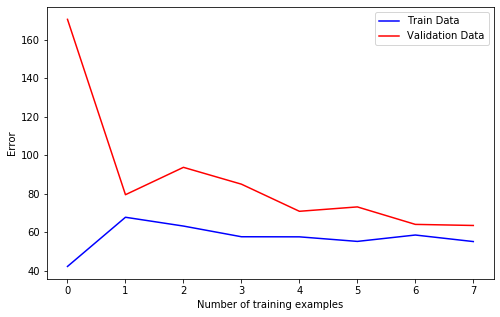

In [60]:
x_val = data['Xval']
y_val = np.squeeze(data['yval'])
plot_learning_curves(x, x_val, y, y_val)

> Из графиков видно что с увеличением размера выборки результат обучения становится точнее

### 7. map features

In [114]:
def map_features(x, p):
    result = x
    for i in range(2, p + 1):
        r = x ** i
        result = np.append(result, r, axis=1)
    return result

### 8. norimilize features

In [115]:
def normilize_features(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma

### 9. train with λ=0 and p=8

In [116]:
X = map_features(x, 8)
X_norm, mu, sigma = normilize_features(X)
X_norm = np.insert(X_norm, 0, 1, axis=1)
theta, costs = gradient_descent_reg(X_norm, y, get_init_theta(X_norm), l=0, alpha=0.3)
print(f'Cost:\t{costs[-1]}\ntheta:\t{theta}')

Cost:	0.25271483023922614
theta:	[11.21758933 12.28233889 11.38602789  3.36072468 -2.91092977 -2.33533198
 -2.43006402 -2.58595693 -1.41584622]


### 10. plot train

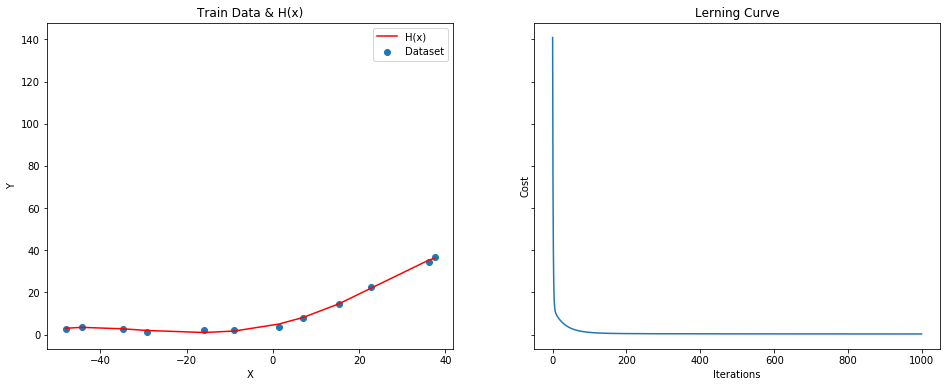

In [117]:
h = X_norm.dot(theta)
new_x, new_h = zip(*sorted(zip(x.flatten(), h)))

fig, axs = plt.subplots(1, 2, sharey = True, figsize=(16, 6))

axs[0].set_title('Train Data & H(x)')
axs[0].scatter(x.flatten(), y, label='Dataset')
axs[0].plot(new_x, new_h, 'r-', label='H(x)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

axs[1].set_title('Lerning Curve')
axs[1].plot(costs)
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Cost')

plt.show()

> Увеличив количество входных признаков мы получили более "гибкую" гипотезу с помощью полиномиальной функции, которая хорошо соответсвует обучающей выборке

### 11. plot train with λ=1 & λ=100

In [118]:
theta1, costs1 = gradient_descent_reg(X_norm, y, get_init_theta(X_norm), l=1, alpha=0.1, num_iters=400)
theta100, costs100 = gradient_descent_reg(X_norm, y, get_init_theta(X_norm), l=100, alpha=0.1, num_iters=400)

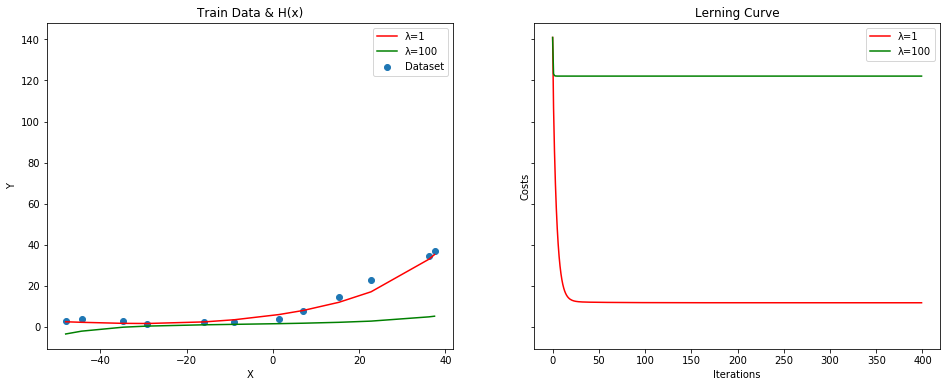

In [119]:
h1 = X_norm.dot(theta1)
new_x1, new_h1 = zip(*sorted(zip(x.flatten(), h1)))

h100 = X_norm.dot(theta100)
new_x100, new_h100 = zip(*sorted(zip(x.flatten(), h100)))

fig, axs = plt.subplots(1, 2, sharey = True, figsize=(16, 6))

axs[0].set_title('Train Data & H(x)')
axs[0].scatter(x.flatten(), y, label='Dataset')
axs[0].plot(new_x1, new_h1, 'r-', label='λ=1')
axs[0].plot(new_x100, new_h100, 'g-', label='λ=100')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

axs[1].set_title('Lerning Curve')
axs[1].plot(costs1, 'r-', label='λ=1')
axs[1].plot(costs100, 'g-', label='λ=100')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Costs')
axs[1].legend()

> λ=1 позволяет избежать переобучения, а большие значения λ приводят к недообучению

### 12. optimal λ search

In [128]:
def get_X(_x):
    _X = map_features(_x, 8)
    _X, _, _ = normilize_features(_X)
    _X = np.insert(_X, 0, 1, axis=1)
    return _X

def optimize_lambda(x_train, x_val, y_train, y_val):
    X_train = get_X(x_train)
    X_val = get_X(x_val)
    
    l_vals = np.linspace(0, 4, 50)
    l_costs = np.empty(shape=(0))
    for l in l_vals:
        theta, costs = gradient_descent_reg(X_train, y_train, get_init_theta(X_train), l=l, alpha=0.2, num_iters=1000)
        c = compute_cost_reg(X_val, y_val, theta, l=0)
        l_costs = np.append(l_costs, c[0])

    plt.figure()
    plt.plot(l_vals, l_costs)
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    plt.show()

    idx = l_costs.argmin()
    return l_vals[idx]

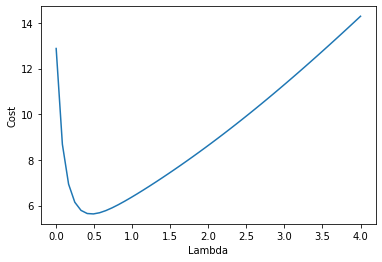

Optimal lambda for validation set:	0.4897959183673469


In [130]:
optimal_l = optimize_lambda(x, x_val, y, y_val)
print(f'Optimal lambda for validation set:\t{optimal_l}')

### 13. test error

In [132]:
x_test = np.array(data['Xtest'])
y_test = np.squeeze(data['ytest'])

X_test = get_X(x_test)
X_train = get_X(x)

theta, _ = gradient_descent_reg(X_train, y, get_init_theta(X_train), l=optimal_l, alpha=0.3, num_iters=1000)
test_cost = compute_cost_reg(X_test, y_test, theta, l=optimal_l)
print(f'Cost on test set: {test_cost[0]}')

Cost on test set: 11.585832169340758


### 14. conclusions

В данной работе был рассмотрен процесс переобучения модели, а также показано влияние на обучение регуляризацией с помощью коэффициента λ